In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# pySuperfish Fish Example

This example should run on Linux, macOS, and Windows

In [2]:
from superfish import Superfish

In [3]:
# by default, will try to use the private container hhslepicka/poisson-superfish:latest
# see https://github.com/hhslepicka/docker-poisson-superfish-nobin for instructions
# on building and using your own docker container
#Superfish._container_image = "poisson-superfish"

In [4]:
import os
AMFILE = os.path.join('data', 'swifel_7.000_9.170_36.000_5.531_9.819_30.000_2.000_5469.am')

In [5]:
# by default, will auto-detect system and use a container on Linux or macOS, or no container on (native) Windows
SF = Superfish(AMFILE, verbose=True)

# On Windows Subsystem for Linux (WSL), if you want to run this notebook on Linux but
# want PySuperfish to use the Windows executables, you can do this instead:
#SF = Superfish(AMFILE, verbose=True, use_container=False)
#Superfish._windows_exe_path = '/mnt/c/LANL/'

Configured to run in: /tmp/tmplb2ssyev
Using container on Linux:
     docker run {interactive_flags} --rm -v {local_path}:/data/ {image} {cmds}


In [6]:
# Run, should take about a minute
SF.run()

Running: docker run  --rm -v /tmp/tmplb2ssyev:/data/ poisson-superfish autofish SWIFEL_7.000_9.170_36.000_5.531_9.819_30.000_2.000_5469.AM
Done in      55.86 seconds
Parsed output: /tmp/tmplb2ssyev/SWIFEL_7.000_9.170_36.000_5.531_9.819_30.000_2.000_5469.SFO


In [7]:
# This is automatically done above
SF.load_output()

Parsed output: /tmp/tmplb2ssyev/SWIFEL_7.000_9.170_36.000_5.531_9.819_30.000_2.000_5469.SFO


# SFO Output

In [10]:
SF.output.keys()

dict_keys(['sfo'])

In [11]:
SF.output['sfo'].keys()

dict_keys(['wall_segments', 'other', 'header', 'BeamEnergy', 'summary'])

In [12]:
# Readback of the basic parameters, with the description

header = SF.output['sfo']['header']
for key in header['variable']:
    print(f"{key:10} {header['variable'][key]:16} {header['description'][key]}")

ALPHAT              0.00393 Temperature coefficient of resistance
ASCALE           3767.30313 Scaling factor for H at drive point
BETA                   0.95 Particle velocity
BETA1                   0.1 Starting BETA in transit-time table
BETA2                  0.95 Ending BETA in transit-time table
CCLDELK                 1.0 Increment for coupling for table in SFO
CCLMAXK                 6.0 Highest coupling for table in SFO
CCLMINK                 1.0 Lowest coupling for table in SFO
CLENGTH                 0.0 Cavity length for normalization in SFO
CLIGHT        29979245800.0 Exact speed of light in cm/sec
CONV                    1.0 Length conversion (number of units per cm)
DBETA                  0.05 BETA increment in transit-time table
DELFR                   0.0 Frequency step size for a resonance search
DIAGDLL                   0 If 1, DLL writes diagnostics to DiagDLL.txt
DKSQ          2.0162059e-10 Change in k^2 after an iteration in Fish
DPHI                  180.0 Phase

In [13]:
SF.output['sfo']['summary']

{'type': 'summary',
 'data': {'Enorm': 30.0,
  'integration_Z1': 50.5,
  'integration_R1': 0.0,
  'integration_Z2': 50.51,
  'integration_R2': 0.0,
  'Frequency': 175.71518,
  'Particle rest mass energy': 0.510999,
  'beta': 0.95,
  'kinetic_energy': 1.82899,
  'Normalization factor for E0': 58982.877,
  'Transit-time factor': 0.9949286,
  'Stored energy': 22.7093948,
  'Superconductor surface resistance': 22.0147,
  'Operating temperature': 4.2,
  'Power dissipation': 7266.1288,
  'Q': 3450580000.0,
  'Shunt impedance': 2001666.082,
  'Rs*Q': 75.963,
  'Z*T*T': 1981414.951,
  'r/Q': 132.072,
  'Wake loss parameter': 0.03645,
  'AvgH': 15002.1,
  'MaxH_z': 24.7307,
  'MaxH_r': 17.4738,
  'MaxH': 31503.2,
  'MaxE_z': 49.6677,
  'MaxE_r': 4.35367,
  'MaxE': 32.9096,
  'Ratio of peak fields Bmax/Emax': 1.2029,
  'Peak-to-average ratio Emax/E0': 4.1385},
 'units': {'Enorm': 'MV/m',
  'integration_Z1': 'cm',
  'integration_R1': 'cm',
  'integration_Z2': 'cm',
  'integration_R2': 'cm',
  'Fr

In [14]:
SF.output['sfo']['summary']['data']

{'Enorm': 30.0,
 'integration_Z1': 50.5,
 'integration_R1': 0.0,
 'integration_Z2': 50.51,
 'integration_R2': 0.0,
 'Frequency': 175.71518,
 'Particle rest mass energy': 0.510999,
 'beta': 0.95,
 'kinetic_energy': 1.82899,
 'Normalization factor for E0': 58982.877,
 'Transit-time factor': 0.9949286,
 'Stored energy': 22.7093948,
 'Superconductor surface resistance': 22.0147,
 'Operating temperature': 4.2,
 'Power dissipation': 7266.1288,
 'Q': 3450580000.0,
 'Shunt impedance': 2001666.082,
 'Rs*Q': 75.963,
 'Z*T*T': 1981414.951,
 'r/Q': 132.072,
 'Wake loss parameter': 0.03645,
 'AvgH': 15002.1,
 'MaxH_z': 24.7307,
 'MaxH_r': 17.4738,
 'MaxH': 31503.2,
 'MaxE_z': 49.6677,
 'MaxE_r': 4.35367,
 'MaxE': 32.9096,
 'Ratio of peak fields Bmax/Emax': 1.2029,
 'Peak-to-average ratio Emax/E0': 4.1385}

In [15]:
# Convenient access and information
SF.param('CONV'), SF.param_info('CONV')

(1.0, 'Length conversion (number of units per cm)')

# Plot

In [16]:
# Nicer plotting
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

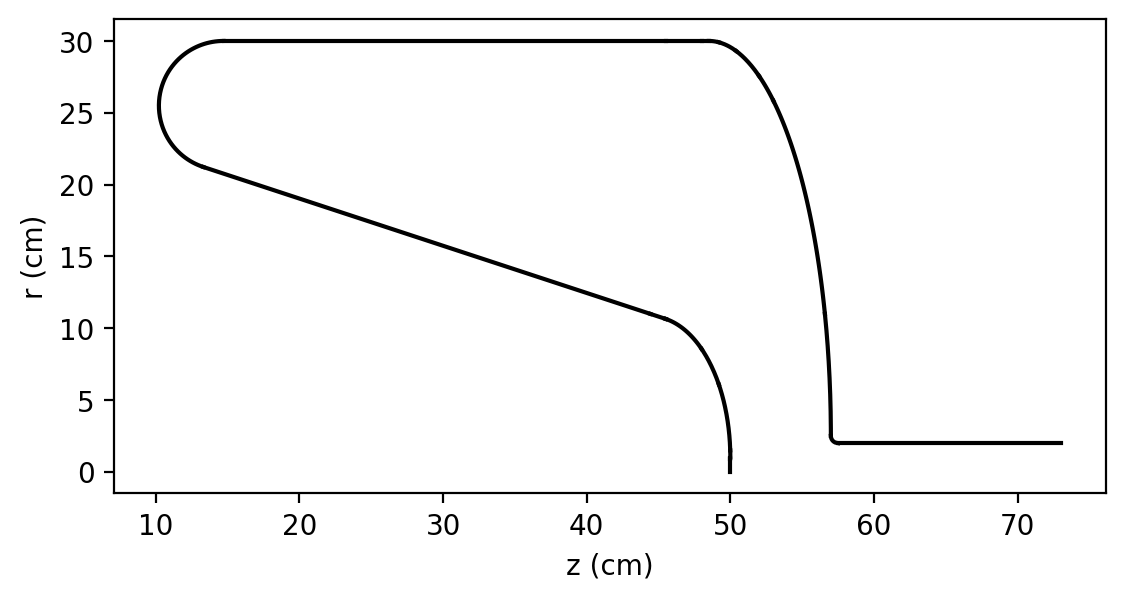

In [17]:
SF.plot_wall()

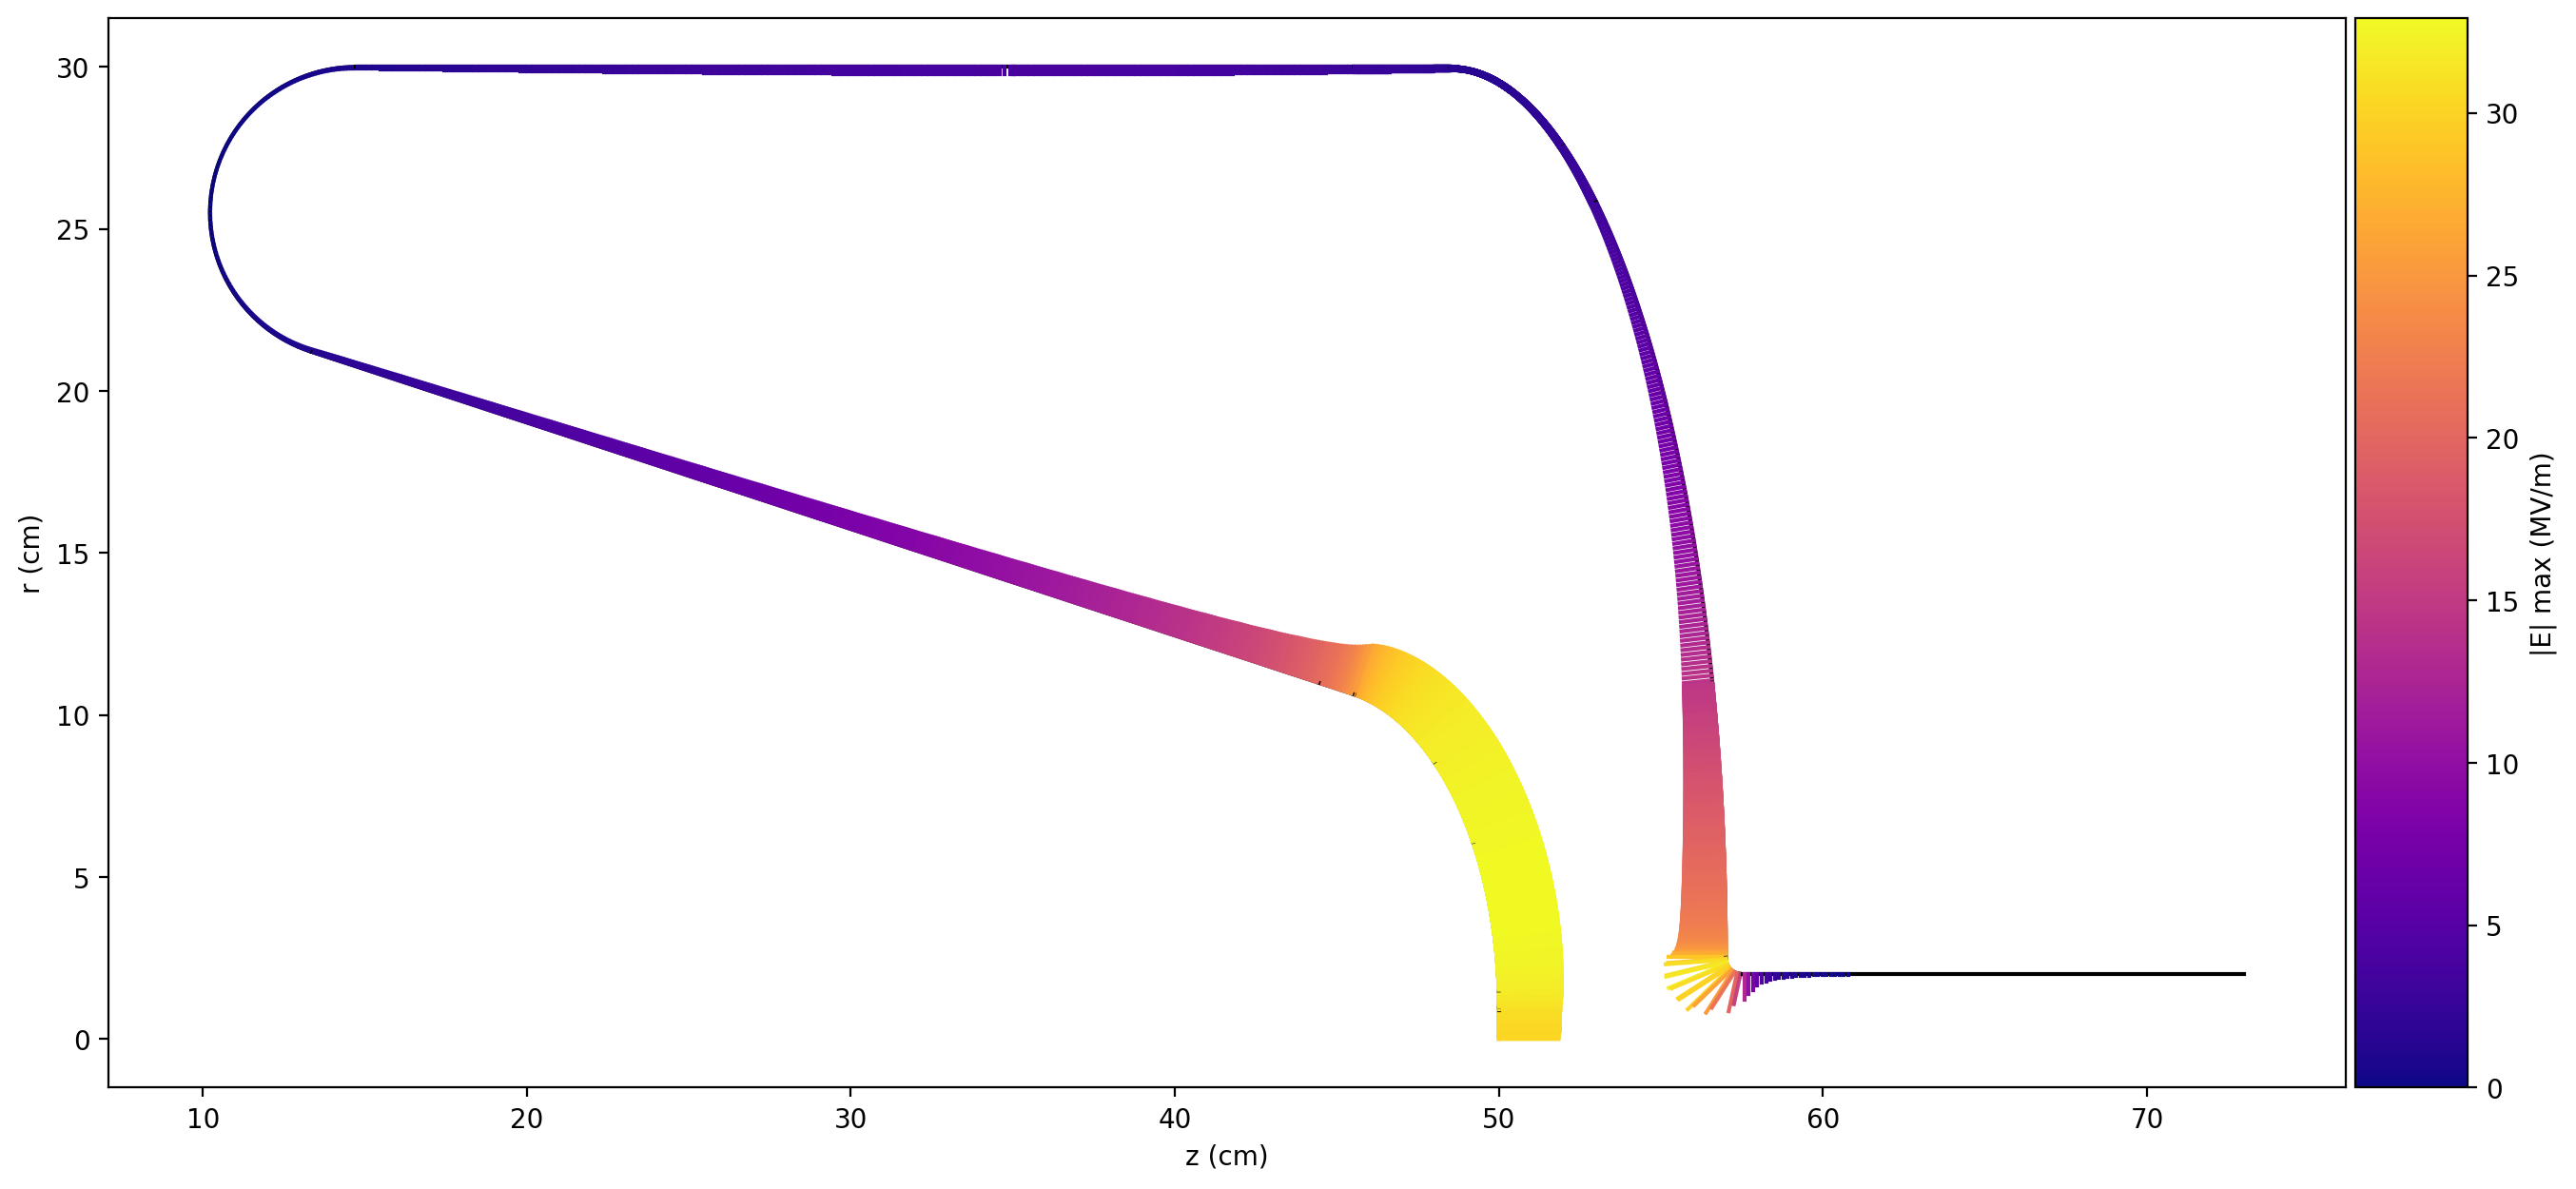

In [18]:
SF.plot_wall(perp_scale=2, figsize=(16,9))

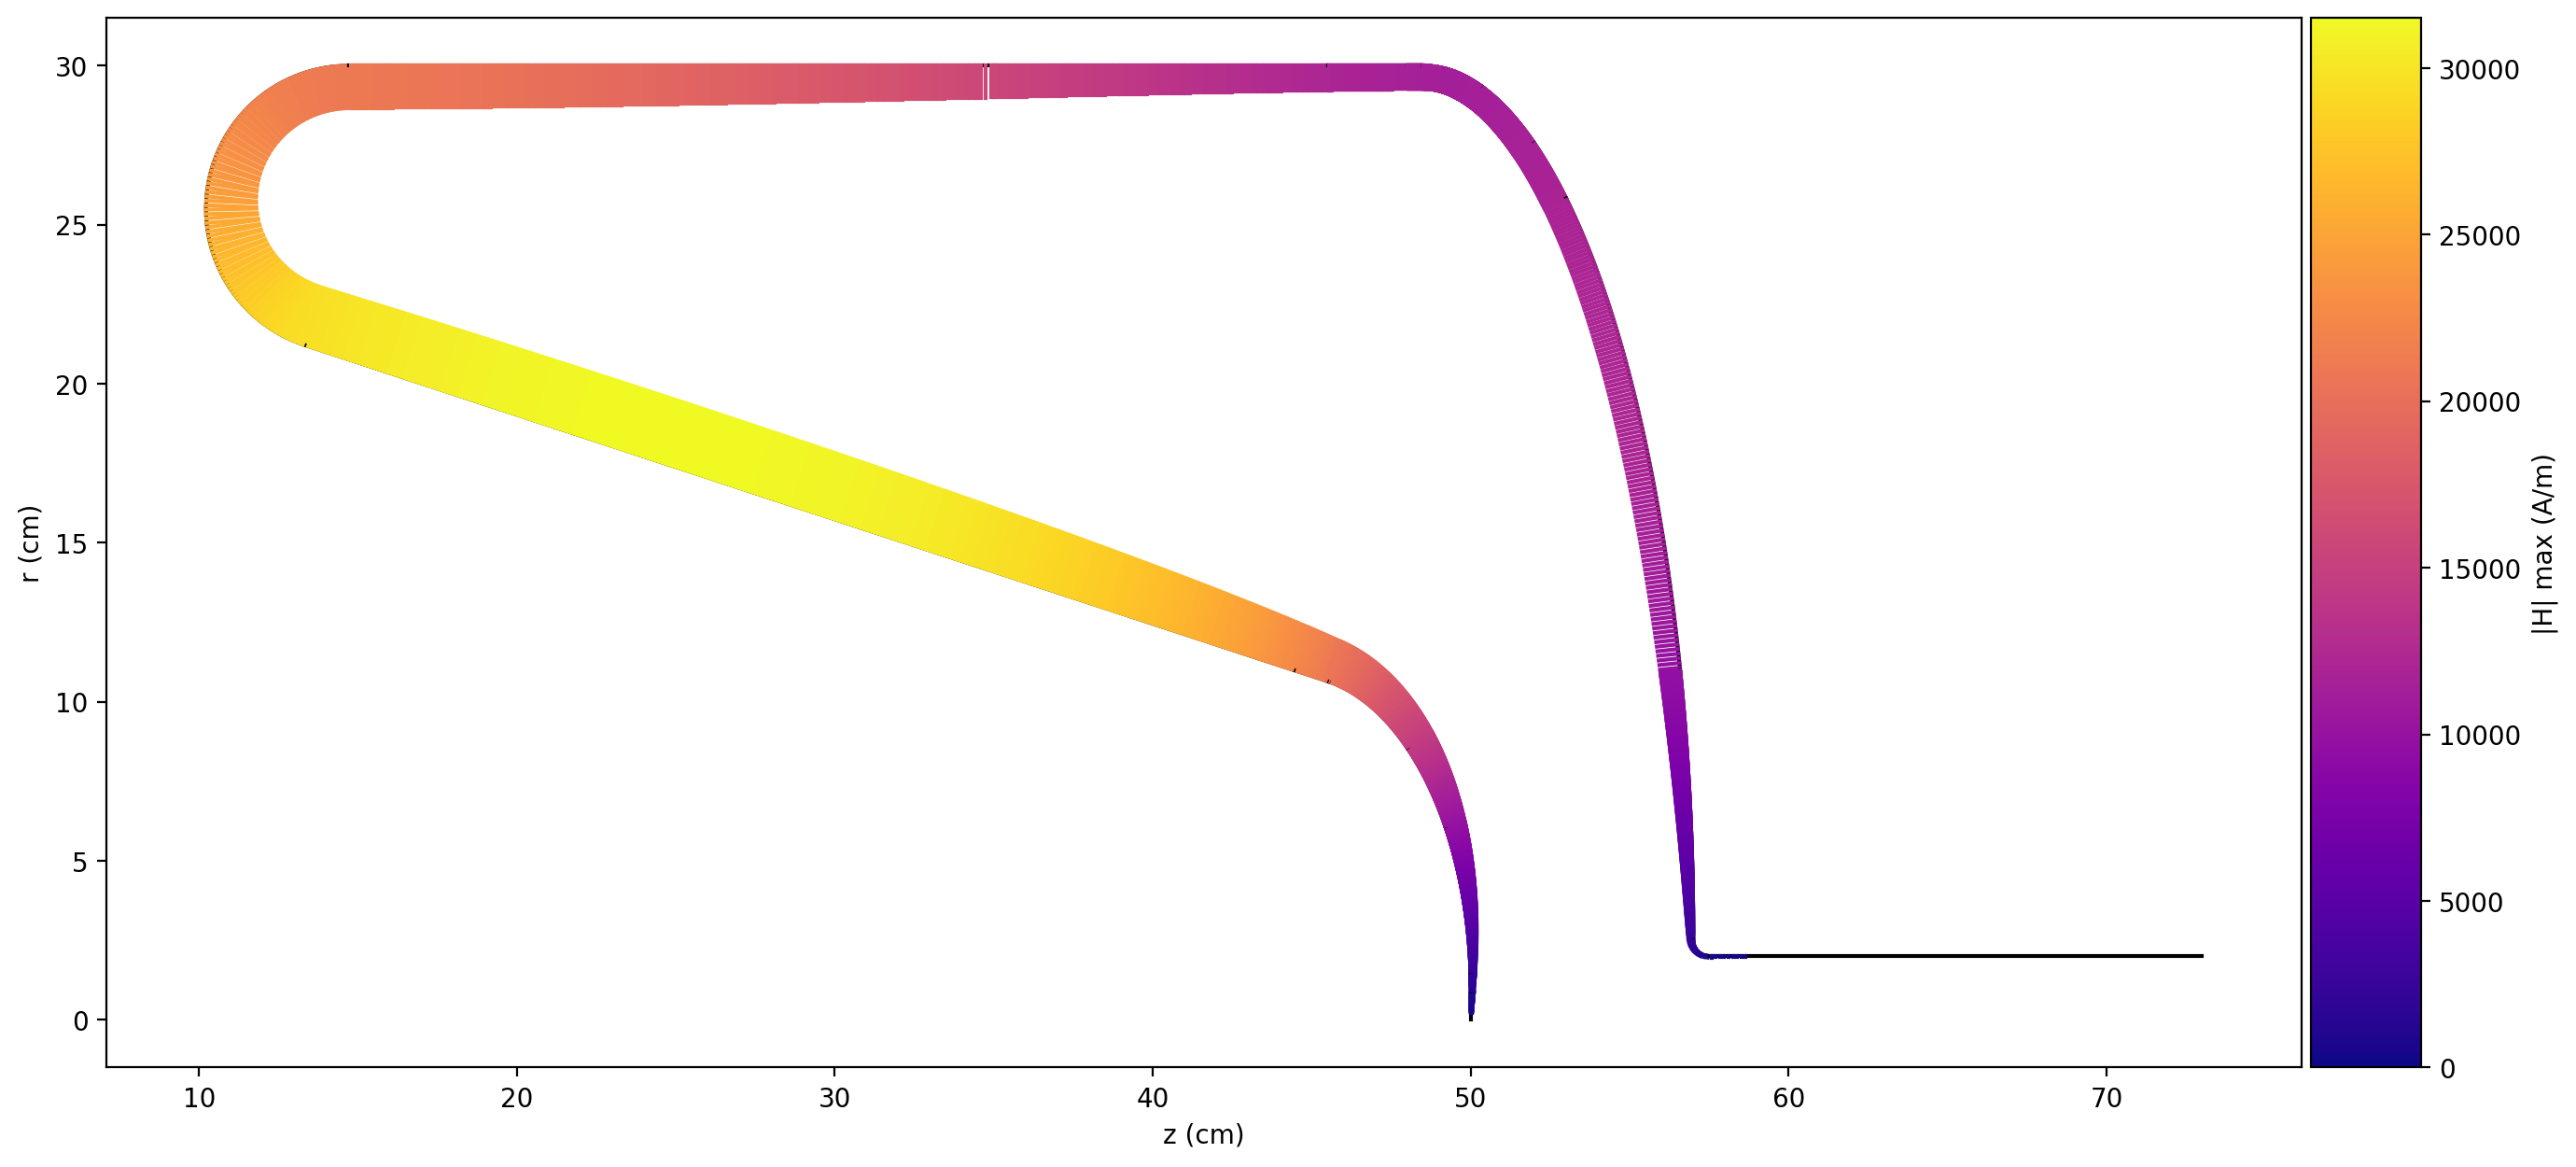

In [19]:
SF.plot_wall(perp_scale=2, field='H', figsize=(16,9))

# Interpolate

In [20]:
?SF.interpolate

Signature: SF.interpolate(zmin=-1000, zmax=1000, nz=100, rmin=0, rmax=0, nr=1)
Docstring: Interpolates field over a grid. 
File:      ~/github/PySuperfish/superfish/superfish.py
Type:      method

In [21]:
SF.interactive = False

In [22]:
%%time
# Get the data
t7data = SF.interpolate(zmin=50, zmax = 70, rmax = 3, nz=100, nr=20)

t7data.keys()

Running: docker run  --rm -v /tmp/tmplb2ssyev:/data/ poisson-superfish sf7 SWIFEL_7.000_9.170_36.000_5.531_9.819_30.000_2.000_5469.IN7 SWIFEL_7.000_9.170_36.000_5.531_9.819_30.000_2.000_5469.T35
CPU times: user 3.04 ms, sys: 112 µs, total: 3.15 ms
Wall time: 9.67 s


dict_keys(['geometry', 'problem', 'zmin', 'zmax', 'nz', 'freq', 'rmin', 'rmax', 'nr', 'Ez', 'Er', 'E', 'Hphi'])

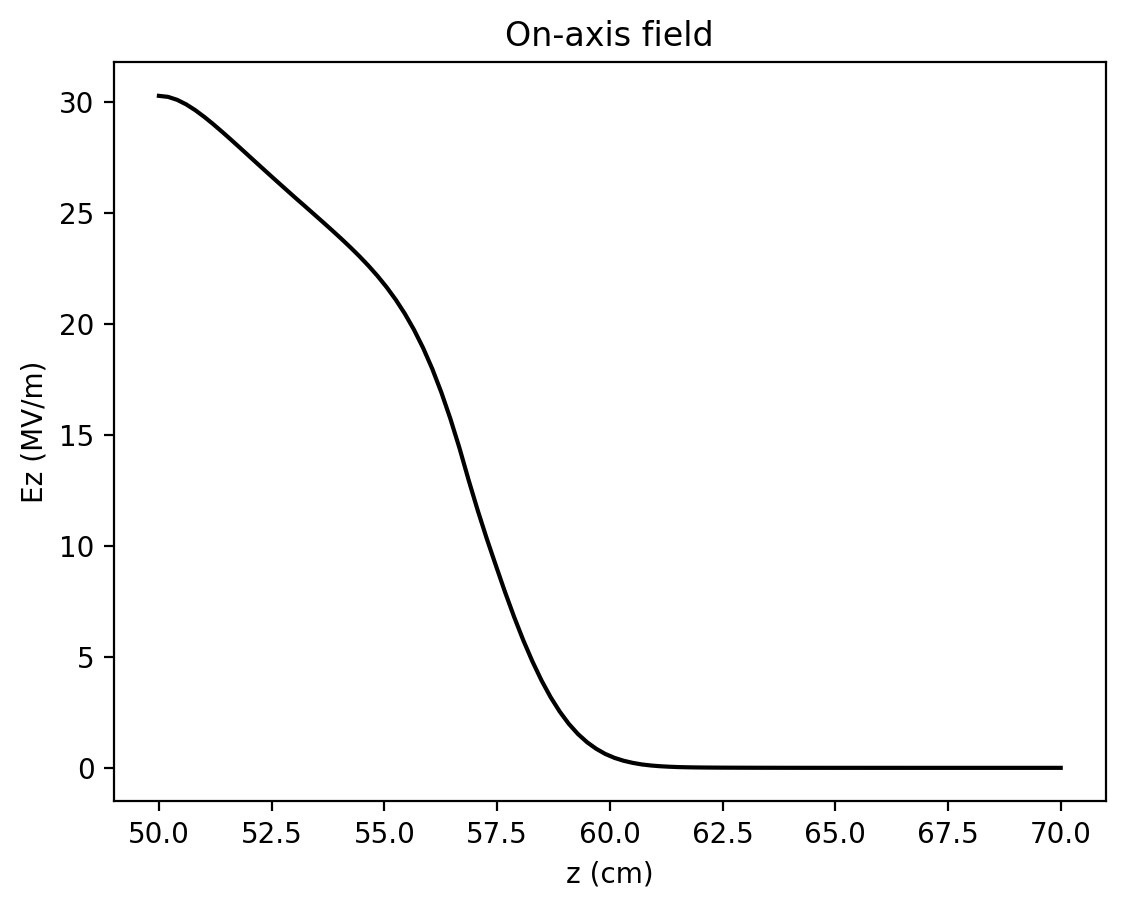

In [23]:
from superfish import plot
import numpy as np

z = np.linspace(t7data['zmin'], t7data['zmax'], t7data['nz'])
Ez = t7data['Ez'][0,:]

plt.title('On-axis field')
plt.xlabel('z (cm)')
plt.ylabel('Ez (MV/m)')
plt.plot(z, Ez, color='black')

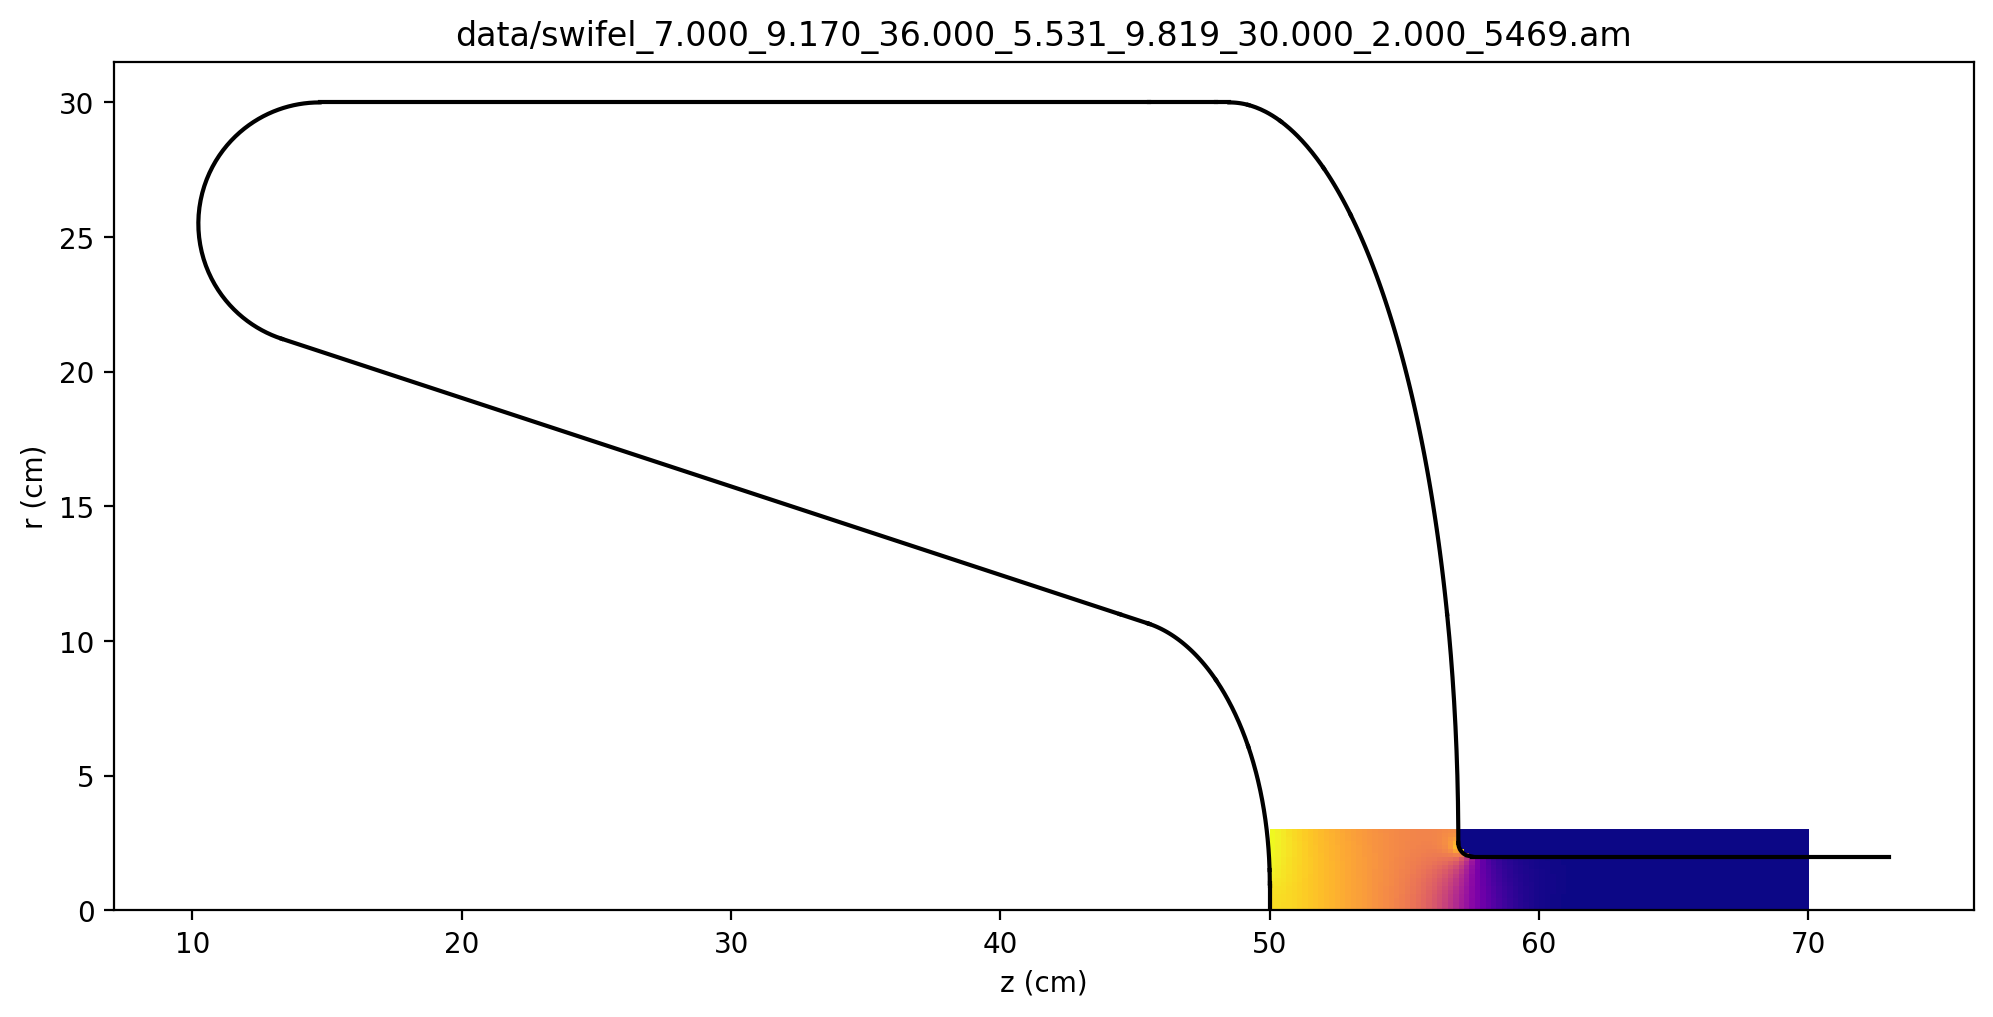

In [24]:
# Plot field data
fig, ax = plt.subplots(figsize=(12,7))

ax.set_title(AMFILE)

plot.add_t7data_to_axes(t7data, ax, field='E')

plot.plot_wall(SF.output['sfo']['wall_segments'], ax=ax)


# FieldMesh from interpolation

Alternatively, an openPMD-beamphysics FieldMesh object can be returned.

In [25]:
FM = SF.fieldmesh(zmin=0.50, zmax=0.7, dz=0.001, rmax=0.02, nr=10)

Running: docker run  --rm -v /tmp/tmplb2ssyev:/data/ poisson-superfish sf7 SWIFEL_7.000_9.170_36.000_5.531_9.819_30.000_2.000_5469.IN7 SWIFEL_7.000_9.170_36.000_5.531_9.819_30.000_2.000_5469.T35


In [26]:
FM.attrs

{'eleAnchorPt': 'beginning',
 'gridGeometry': 'cylindrical',
 'axisLabels': ('r', 'theta', 'z'),
 'gridLowerBound': (0, 1, 0),
 'gridOriginOffset': (0, 0, 0.5),
 'gridSpacing': (0.0022222222222222222, 0, 0.0010000000000000002),
 'gridSize': (10, 1, 200),
 'harmonic': 1,
 'fundamentalFrequency': 175715180.667,
 'RFphase': 0,
 'fieldScale': 1.0}

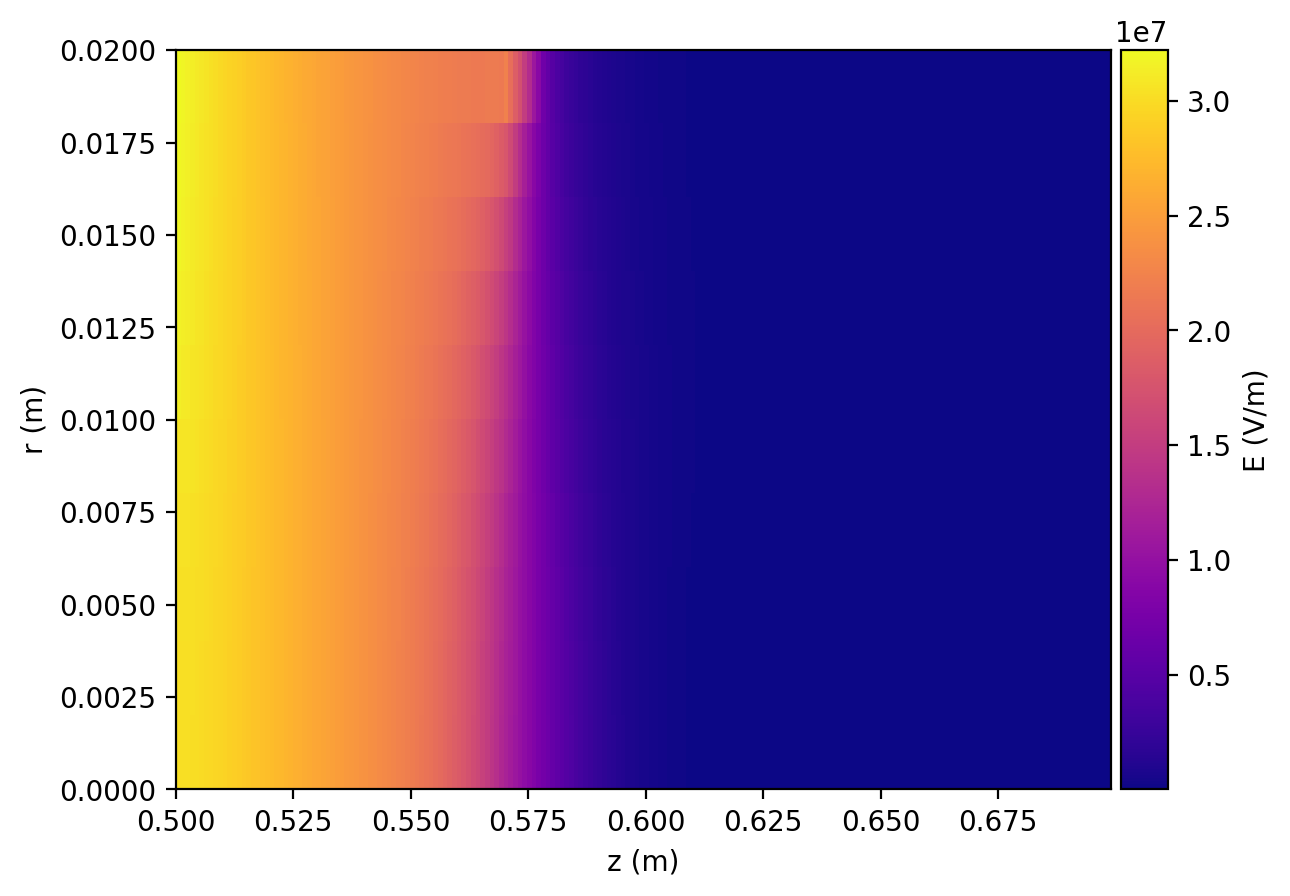

In [27]:
FM.plot('E')

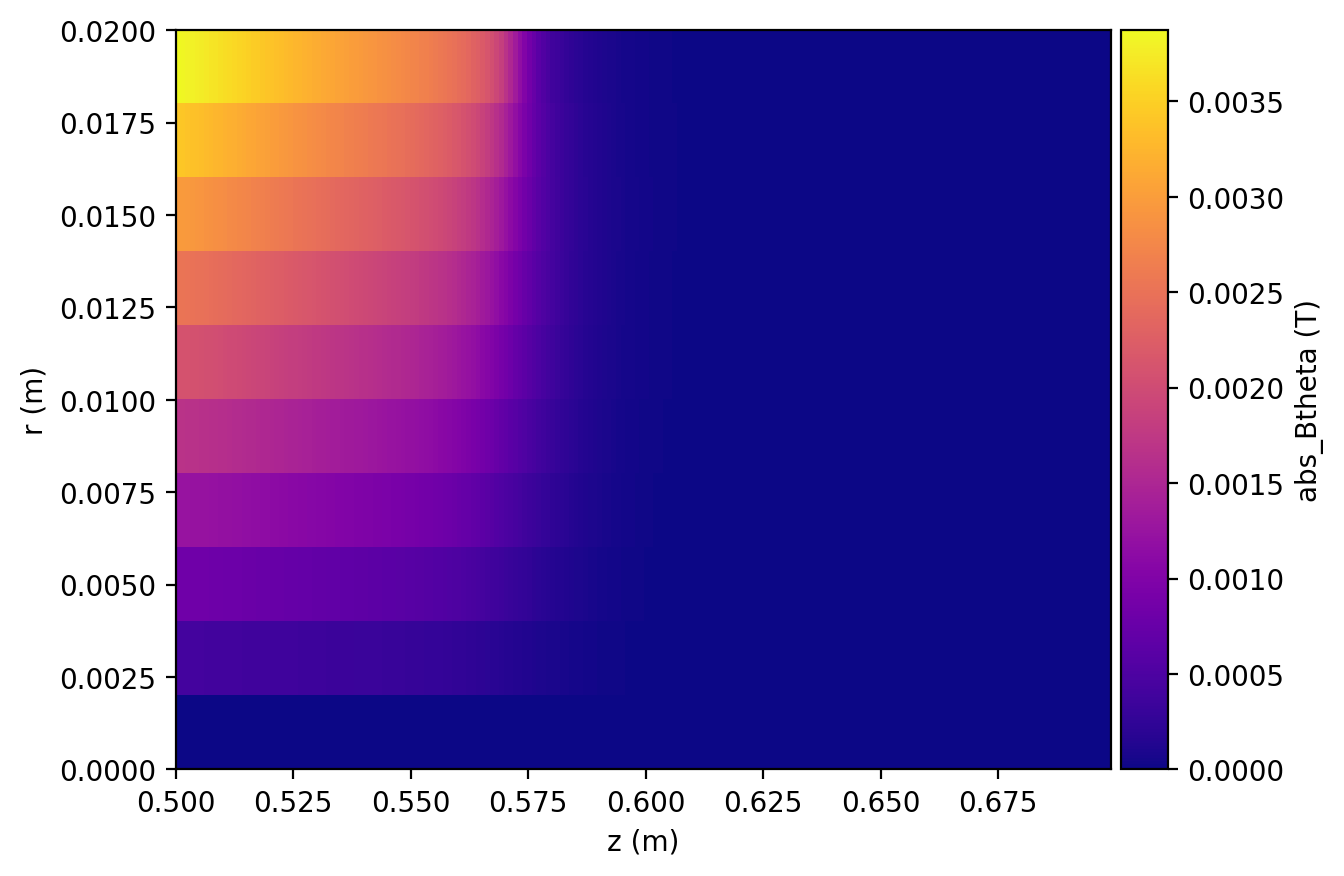

In [28]:
# Btheta is complex (pure imaginary in this case). Access via:
FM.plot('abs_Btheta')

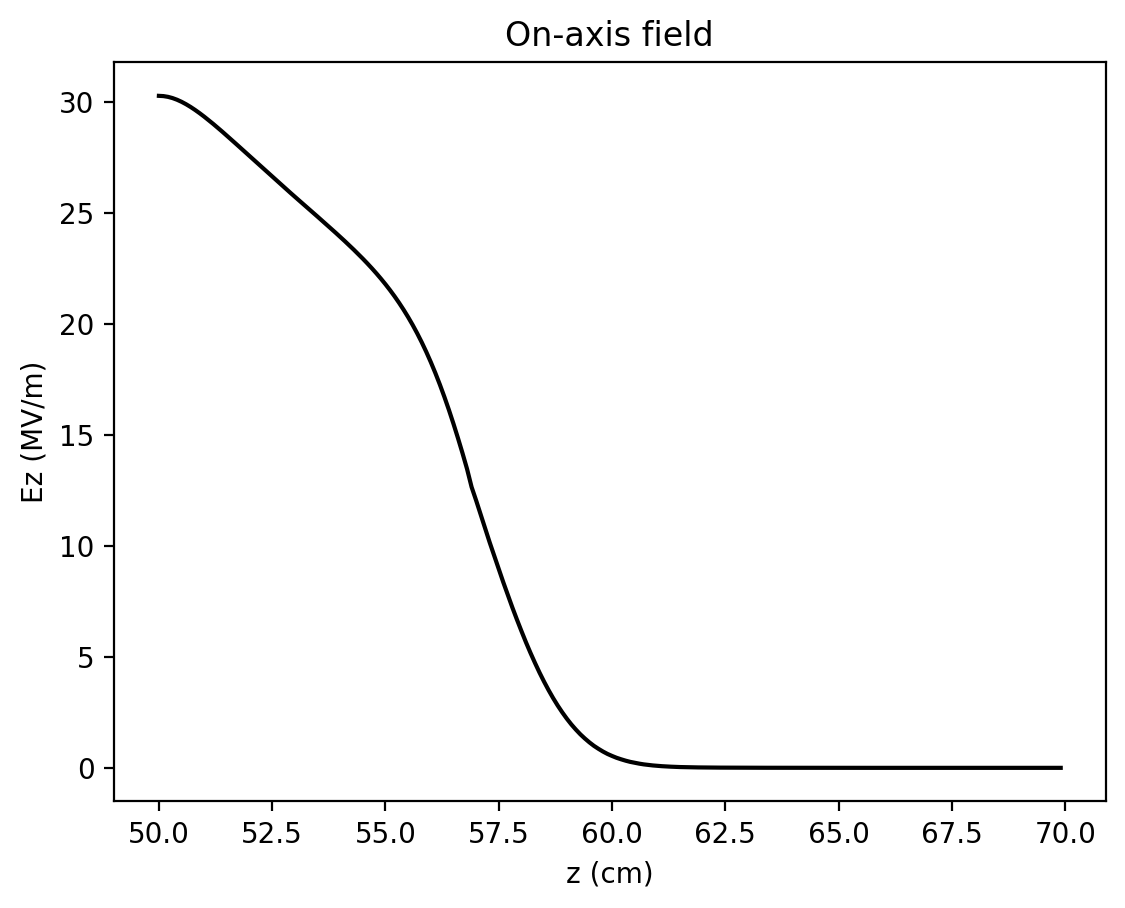

In [29]:
# On-axis field
z0 = FM.coord_vec('z')
Ez0 = np.real(FM.Ez[0,0,:])
plt.title('On-axis field')
plt.xlabel('z (cm)')
plt.ylabel('Ez (MV/m)')
plt.plot(z0*100, Ez0/1e6, color='black')

# Interactive

You can use Superfish's own graphical tools (when running in a container) with the interactive flag (currently, only supported on macOS).


In [ ]:
SF.interactive = True

# This will pop up the WSFPLOT.EXE window.
SF.run_cmd('wsfplot')

SF.interactive = False

In [28]:
# Save 
#!cp {SF.path}/SWIFEL1.T7 data/SWIFEL.T7
#!cp {SF.path}/OUTSF7.TXT data/SWIFEL_OUTSF7.TXT